DOC constituent - EDA, pre-processing - Product

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.colorbrewer.diverging import *

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
sns.set(style='whitegrid', palette="Spectral_r")
# dual_colors = [ '#009fca','#00f8b9'] #'#005e79',

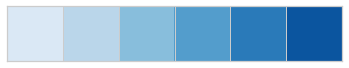

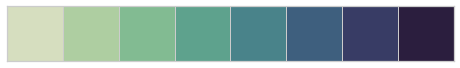

In [4]:
cb_pal = sns.cubehelix_palette(8, start=0.5, rot=-.75)
cpal = sns.color_palette("Blues")
# dual_colors = [cpal[3],cpal[2]]
# sns.set_palette(cpal)
sns.palplot(cpal)
sns.palplot(cb_pal)

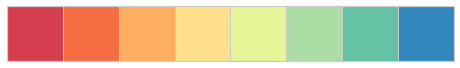

In [5]:
colors = Spectral_8.hex_colors
dual_colors = [colors[-1],colors[4]]
sns.palplot(colors)

### Exploring Product
### Which product is most frequent?
### Is the most frequent product same as the one with highest sales?
### Which product has most claim and claim rate?

In [6]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [7]:
df.columns = df.columns.map(lambda x: x.lower())
df.columns = df.columns.map(lambda x: x.replace(" ","_"))

In [8]:
df.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_(in_value),age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [9]:
df.groupby("product_name")[["product_name"]].count().rename(columns={"product_name":"counts"}).sort_values("counts",ascending=False)

,counts
product_name,
Cancellation Plan,13254
2 way Comprehensive Plan,10555
Rental Vehicle Excess Insurance,6813
Bronze Plan,4723
Basic Plan,4042
Silver Plan,2862
1 way Comprehensive Plan,2409
Annual Silver Plan,2348
Value Plan,1961


In [10]:
df.groupby("product_name")[["product_name"]].count().rename(columns={"product_name":"counts"}).sort_values("counts",ascending=False)

,counts
product_name,
Cancellation Plan,13254
2 way Comprehensive Plan,10555
Rental Vehicle Excess Insurance,6813
Bronze Plan,4723
Basic Plan,4042
Silver Plan,2862
1 way Comprehensive Plan,2409
Annual Silver Plan,2348
Value Plan,1961


In [11]:
# Most frequent Product
df[["product_name"]].describe()

,product_name
count,52310
unique,25
top,Cancellation Plan
freq,13254


### Product with highest net sales

In [12]:
df.groupby(["product_name"])[["net_sales"]].agg(["count","mean","min","max"]) #.sort_values("net_sales", ascending = False)

net_sales                          \
                                         count        mean         min   
product_name                                                             
1 way Comprehensive Plan                  2409   27.502427  -84.000000   
2 way Comprehensive Plan                 10555   43.871924 -112.000000   
24 Protect                                 165   20.540364  -28.500000   
Annual Gold Plan                           295  356.650083 -287.400000   
Annual Silver Plan                        2348  225.598643 -389.000000   
Annual Travel Protect Gold                 183  258.711839  194.621413   
Annual Travel Protect Platinum              50  330.869159  264.000000   
Annual Travel Protect Silver                92  197.343618    0.000000   
Basic Plan                                4042   26.544246  -69.000000   
Bronze Plan                               4723   35.181802 -281.000000   
Cancellation Plan                        13254   26.303287 -128.000000   
Child Comprehensive Plan                     8   74.000000   74.000000   
Comprehensive Plan                         278   28.690520  -29.000000   
Gold Plan                                  380   75.505900 -357.500000   
Individual Comprehensive Plan               84   98.819497   85.076271   
Premier Plan                               141   63.340426 -147.000000   
Rental Vehicle Excess Insurance           6813   46.103047 -287.100000   
Silver Plan                               2862   59.400097  -70.850000   
Single Trip Travel Protect Gold            251   37.944770  -48.500000   
Single Trip Travel Protect Platinum        100   46.591398    0.000000   
Single Trip Travel Protect Silver          130   34.368907  -26.500000   
Spouse or Parents Comprehensive Plan        12   86.000000   86.000000   
Ticket Protector                           780    6.582631   -0.070000   
Travel Cruise Protect                      394   29.270888  -30.000000   
Value Plan                                1961   47.526106 -138.000000   

                                                  
                                             max  
product_name                                      
1 way Comprehensive Plan              112.000000  
2 way Comprehensive Plan              192.000000  
24 Protect                            184.420000  
Annual Gold Plan                      666.000000  
Annual Silver Plan                    432.000000  
Annual Travel Protect Gold            323.400000  
Annual Travel Protect Platinum        404.250000  
Annual Travel Protect Silver          287.250000  
Basic Plan                            179.000000  
Bronze Plan                           682.000000  
Cancellation Plan                     128.000000  
Child Comprehensive Plan               74.000000  
Comprehensive Plan                    153.000000  
Gold Plan                             572.500000  
Individual Comprehensive Plan         154.611198  
Premier Plan                          255.000000  
Rental Vehicle Excess Insurance       297.000000  
Silver Plan                           557.400000  
Single Trip Travel Protect Gold       123.750000  
Single Trip Travel Protect Platinum   138.400000  
Single Trip Travel Protect Silver      95.250000  
Spouse or Parents Comprehensive Plan   86.000000  
Ticket Protector                      150.450000  
Travel Cruise Protect                  34.415864  
Value Plan                            420.000000

#### Top 5 Products for Netsales
* by mean
* by sum

In [14]:
#top 5 products by mean of net sales

net_sales_top5_mean = df.groupby(["product_name"])[["net_sales"]].mean().sort_values("net_sales", ascending = False).iloc[:5]

In [15]:
net_sales_top5_mean

,net_sales
product_name,
Annual Gold Plan,356.650083
Annual Travel Protect Platinum,330.869159
Annual Travel Protect Gold,258.711839
Annual Silver Plan,225.598643
Annual Travel Protect Silver,197.343618


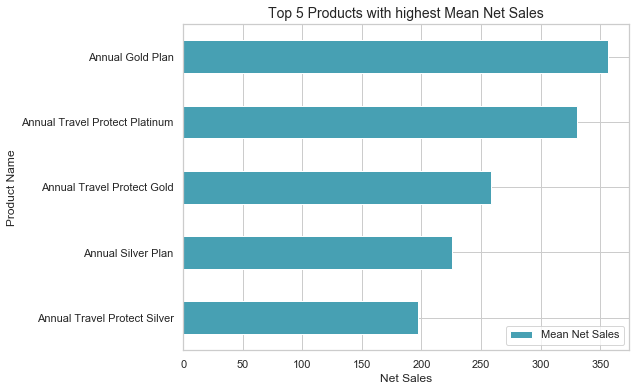

In [68]:
#plotting top 5 products by mean of net sales

net_sales_top5_mean.sort_values('net_sales',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Mean Net Sales',fontdict={'fontsize':14})
plt.xlabel('Net Sales')
plt.ylabel('Product Name')
plt.legend(['Mean Net Sales'])

plt.show()

In [65]:
#top 5 products by sum of net sales

net_sales_top5_sum = df.groupby(["product_name"])[["net_sales"]].sum().sort_values("net_sales", ascending = False).iloc[:5]
net_sales_top5_sum
# .sort_values('net_sales',ascending=False)


,net_sales
product_name,
Annual Silver Plan,529705.614727
2 way Comprehensive Plan,463068.162004
Cancellation Plan,348623.765841
Rental Vehicle Excess Insurance,314100.060080
Silver Plan,170003.076877


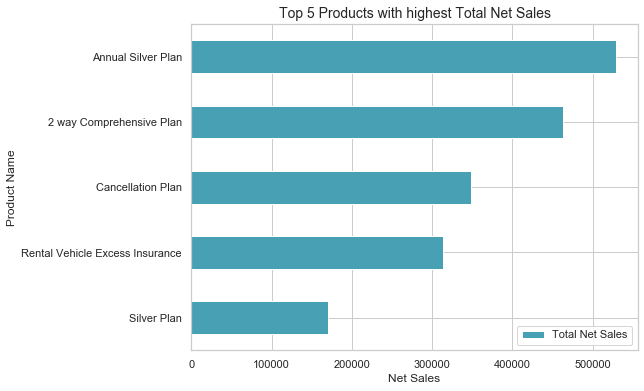

In [71]:
#plotting top 5 products by sum of net sales
net_sales_top5_sum.sort_values('net_sales',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total Net Sales',fontdict={'fontsize':14})
plt.xlabel('Net Sales')
plt.ylabel('Product Name')
plt.legend(['Total Net Sales'])
plt.show()

In [18]:
df[(df.product_name=="Annual Gold Plan")|(df.product_name=="Annual Silver Plan")].groupby(["product_name"])[["net_sales","commision_(in_value)"]].agg(["count","sum","mean"])

net_sales                            commision_(in_value)  \
                       count            sum        mean                count   
product_name                                                                   
Annual Gold Plan         295  105211.774342  356.650083                  295   
Annual Silver Plan      2348  529705.614727  225.598643                 2348   

                                              
                              sum       mean  
product_name                                  
Annual Gold Plan     26990.030566  91.491629  
Annual Silver Plan  134520.980472  57.291729

### Net sales per product is highest for annual gold plan
### Overal net sales are higher for annual silver plan

In [19]:
a =df.groupby(["product_name"])[["net_sales"]].mean().sort_values("net_sales", ascending = False).iloc[:5]

### The most frequent is not even in the top 10 net sales chart.
### Annual Gold Plan has highest net sale.

### Product vs net sales vs commision

In [72]:
comm_top5_mean = df.groupby(["product_name",])[["commision_(in_value)"]].mean().sort_values("commision_(in_value)",ascending=False)[:5]
comm_top5_mean


,commision_(in_value)
product_name,
Annual Travel Protect Platinum,215.064490
Annual Travel Protect Gold,168.162634
Annual Travel Protect Silver,133.677591
Annual Gold Plan,91.491629
Annual Silver Plan,57.291729


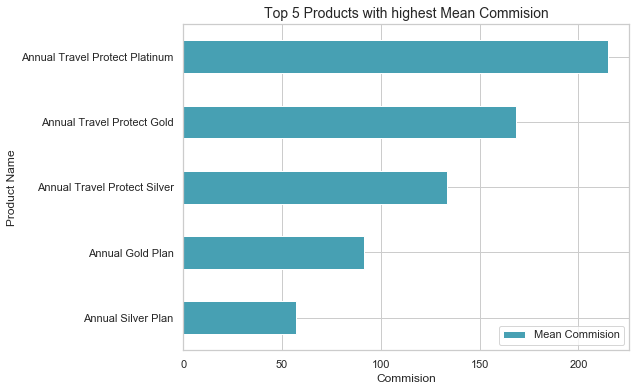

In [73]:
comm_top5_mean.sort_values('commision_(in_value)',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Mean Commision',fontdict={'fontsize':14})
plt.xlabel('Commision')
plt.ylabel('Product Name')
plt.legend(['Mean Commision'])
plt.show()

In [74]:
comm_top5_sum = df.groupby(["product_name",])[["commision_(in_value)"]].sum().sort_values("commision_(in_value)",ascending=False)[:5]
comm_top5_sum


,commision_(in_value)
product_name,
Rental Vehicle Excess Insurance,227852.793835
Annual Silver Plan,134520.980472
Silver Plan,43360.453712
Bronze Plan,42748.012172
Basic Plan,38768.280844


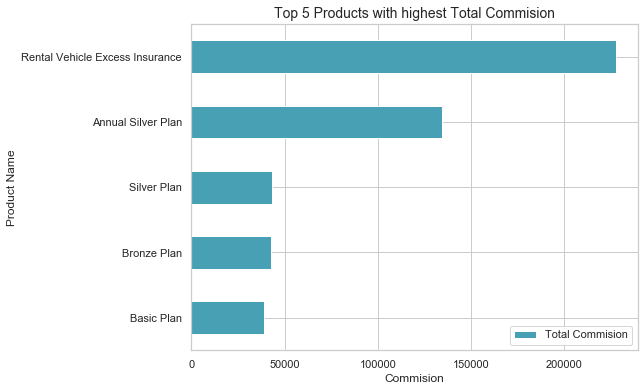

In [75]:
comm_top5_sum.sort_values('commision_(in_value)',ascending=True).plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total Commision',fontdict={'fontsize':14})
plt.xlabel('Commision')
plt.ylabel('Product Name')
plt.legend(['Total Commision'])
plt.show()

In [70]:
comm_sum5 = df.groupby(["product_name",'claim'])[["commision_(in_value)"]].sum().sort_values("commision_(in_value)",ascending=False)[:10]

In [69]:
# comm_sum5

In [90]:
# df.groupby(["product_name",])[["commision_(in_value)"]].agg(["sum","mean"])

In [25]:
df[(df.product_name=="Rental Vehicle Excess Insurance")|(df.product_name=="Annual Travel Protect Platinum")].groupby(["product_name"])[["commision_(in_value)"]].agg(["count","sum","mean"])

commision_(in_value)                 \
                                               count            sum   
product_name                                                          
Annual Travel Protect Platinum                    50   10753.224492   
Rental Vehicle Excess Insurance                 6813  227852.793835   

                                             
                                       mean  
product_name                                 
Annual Travel Protect Platinum   215.064490  
Rental Vehicle Excess Insurance   33.443827

#### Inference: 
* Annual Travel Protect Platinum commision is highest for per product, Rental Vehicle Excess Insurance has highest profit 
* Annual Travel Protect Platinum is the one with highest commision.

In [26]:
# product - mean of netsales & commission (sort - netsales)
df.groupby(["product_name",])[["net_sales","commision_(in_value)"]].mean().sort_values("net_sales", ascending=False)

,net_sales,commision_(in_value)
product_name,,
Annual Gold Plan,356.650083,91.491629
Annual Travel Protect Platinum,330.869159,215.064490
Annual Travel Protect Gold,258.711839,168.162634
Annual Silver Plan,225.598643,57.291729
Annual Travel Protect Silver,197.343618,133.677591
Individual Comprehensive Plan,98.819497,2.230744
Spouse or Parents Comprehensive Plan,86.000000,0.000000
Gold Plan,75.505900,20.212319
Child Comprehensive Plan,74.000000,0.000000


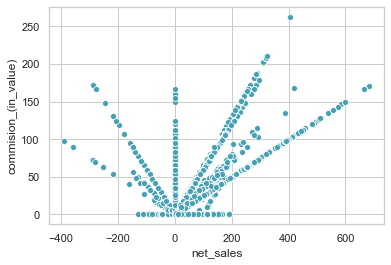

In [27]:
# sns.scatterplot(dff.net_sales, dff["commision_(in_value)"])
sns.scatterplot(df.net_sales, df["commision_(in_value)"])
plt.show()

In [28]:
df.groupby(["product_name"])[["claim"]].count().sort_values("claim", ascending=False)[:5]

,claim
product_name,
Cancellation Plan,13254
2 way Comprehensive Plan,10555
Rental Vehicle Excess Insurance,6813
Bronze Plan,4723
Basic Plan,4042


### Most frequent product has claimed the most

In [29]:
df.groupby(["product_name"])[["claim"]].count().sort_values("claim", ascending=False)[:5]

,claim
product_name,
Cancellation Plan,13254
2 way Comprehensive Plan,10555
Rental Vehicle Excess Insurance,6813
Bronze Plan,4723
Basic Plan,4042


### Most frequent product is the one with highest claim rate.

In [30]:
dff = df.groupby(["product_name","claim"])[["claim"]].count()/df.groupby(["product_name"])[["claim"]].count()*100

In [31]:
dff = dff.rename(columns={"claim":"counts"})

In [32]:
dff


counts
product_name                         claim            
1 way Comprehensive Plan             0       97.177252
                                     1        2.822748
2 way Comprehensive Plan             0       86.196116
                                     1       13.803884
24 Protect                           0      100.000000
Annual Gold Plan                     0       41.694915
                                     1       58.305085
Annual Silver Plan                   0       38.202726
                                     1       61.797274
Annual Travel Protect Gold           0       34.426230
                                     1       65.573770
Annual Travel Protect Platinum       0       72.000000
                                     1       28.000000
Annual Travel Protect Silver         0       66.304348
                                     1       33.695652
Basic Plan                           0       93.913904
                                     1        6.086096
Bronze Plan                          0       57.230574
                                     1       42.769426
Cancellation Plan                    0       97.321563
                                     1        2.678437
Child Comprehensive Plan             0      100.000000
Comprehensive Plan                   0       95.683453
                                     1        4.316547
Gold Plan                            0       62.368421
                                     1       37.631579
Individual Comprehensive Plan        0       55.952381
                                     1       44.047619
Premier Plan                         0       98.581560
                                     1        1.418440
Rental Vehicle Excess Insurance      0       87.553207
                                     1       12.446793
Silver Plan                          0       51.642208
                                     1       48.357792
Single Trip Travel Protect Gold      0       51.792829
                                     1       48.207171
Single Trip Travel Protect Platinum  0       50.000000
                                     1       50.000000
Single Trip Travel Protect Silver    0       87.692308
                                     1       12.307692
Spouse or Parents Comprehensive Plan 0       91.666667
                                     1        8.333333
Ticket Protector                     0       92.692308
                                     1        7.307692
Travel Cruise Protect                0       94.670051
                                     1        5.329949
Value Plan                           0       95.206527
                                     1        4.793473

#### Claim rate for all products

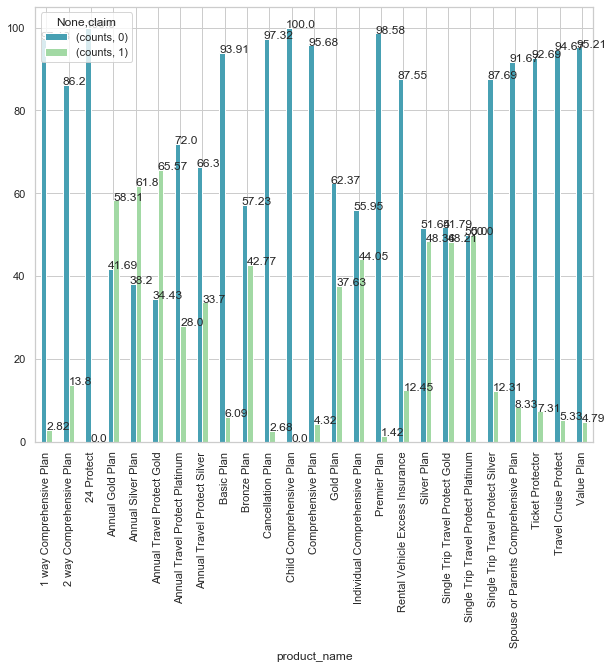

In [33]:
ax = dff.unstack().plot(kind="bar", figsize=(10,8))
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(np.round(h,2), (x,y+h))
plt.show()

#### Inference:
*  The % claim of the product Annual Travel Protector Gold is highest.
* Though the highest sales were for Cancellation Plan still it does not contibute to .
* Rental Vehicle Excess Insurance has highest total netsales 

In [34]:
dff

counts
product_name                         claim            
1 way Comprehensive Plan             0       97.177252
                                     1        2.822748
2 way Comprehensive Plan             0       86.196116
                                     1       13.803884
24 Protect                           0      100.000000
Annual Gold Plan                     0       41.694915
                                     1       58.305085
Annual Silver Plan                   0       38.202726
                                     1       61.797274
Annual Travel Protect Gold           0       34.426230
                                     1       65.573770
Annual Travel Protect Platinum       0       72.000000
                                     1       28.000000
Annual Travel Protect Silver         0       66.304348
                                     1       33.695652
Basic Plan                           0       93.913904
                                     1        6.086096
Bronze Plan                          0       57.230574
                                     1       42.769426
Cancellation Plan                    0       97.321563
                                     1        2.678437
Child Comprehensive Plan             0      100.000000
Comprehensive Plan                   0       95.683453
                                     1        4.316547
Gold Plan                            0       62.368421
                                     1       37.631579
Individual Comprehensive Plan        0       55.952381
                                     1       44.047619
Premier Plan                         0       98.581560
                                     1        1.418440
Rental Vehicle Excess Insurance      0       87.553207
                                     1       12.446793
Silver Plan                          0       51.642208
                                     1       48.357792
Single Trip Travel Protect Gold      0       51.792829
                                     1       48.207171
Single Trip Travel Protect Platinum  0       50.000000
                                     1       50.000000
Single Trip Travel Protect Silver    0       87.692308
                                     1       12.307692
Spouse or Parents Comprehensive Plan 0       91.666667
                                     1        8.333333
Ticket Protector                     0       92.692308
                                     1        7.307692
Travel Cruise Protect                0       94.670051
                                     1        5.329949
Value Plan                           0       95.206527
                                     1        4.793473

In [35]:
# pd.DataFrame(df.groupby('product_name')['claim'].value_counts())

In [88]:
#top 10 list - products
dff_ri = dff.reset_index()
temp = dff_ri[dff_ri['claim']==1].sort_values('counts',ascending=False).drop('claim',axis=1)
# temp2 = 
# .set_index('product_name').plot(kind='bar')
list_top10 = list(temp['product_name'][:10])
list_top10

['Annual Travel Protect Gold',
 'Annual Silver Plan',
 'Annual Gold Plan',
 'Single Trip Travel Protect Platinum',
 'Silver Plan',
 'Single Trip Travel Protect Gold',
 'Individual Comprehensive Plan',
 'Bronze Plan',
 'Gold Plan',
 'Annual Travel Protect Silver']

In [39]:
dff_ri

,product_name,claim,counts
0,1 way Comprehensive Plan,0,97.177252
1,1 way Comprehensive Plan,1,2.822748
2,2 way Comprehensive Plan,0,86.196116
3,2 way Comprehensive Plan,1,13.803884
4,24 Protect,0,100.000000
5,Annual Gold Plan,0,41.694915
6,Annual Gold Plan,1,58.305085
7,Annual Silver Plan,0,38.202726
8,Annual Silver Plan,1,61.797274
9,Annual Travel Protect Gold,0,34.426230


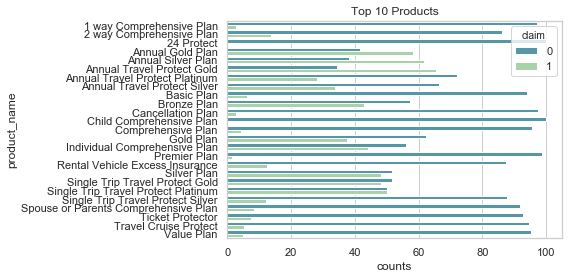

In [40]:
sns.barplot(x='counts',y='product_name',data=dff_ri,hue='claim')
plt.title('Top 10 Products')
plt.show()

In [41]:
d = df[(df.product_name=="Rental Vehicle Excess Insurance")|(df.product_name=="Annual Travel Protect Platinum")|
      (df.product_name=="Annual Gold Plan")|(df.product_name=="Annual Silver Plan")]

In [42]:
d.groupby(["product_name"])[['net_sales',"commision_(in_value)"]].agg(["count","sum","mean"])

net_sales                             \
                                    count            sum        mean   
product_name                                                           
Annual Gold Plan                      295  105211.774342  356.650083   
Annual Silver Plan                   2348  529705.614727  225.598643   
Annual Travel Protect Platinum         50   16543.457956  330.869159   
Rental Vehicle Excess Insurance      6813  314100.060080   46.103047   

                                commision_(in_value)                 \
                                               count            sum   
product_name                                                          
Annual Gold Plan                                 295   26990.030566   
Annual Silver Plan                              2348  134520.980472   
Annual Travel Protect Platinum                    50   10753.224492   
Rental Vehicle Excess Insurance                 6813  227852.793835   

                                             
                                       mean  
product_name                                 
Annual Gold Plan                  91.491629  
Annual Silver Plan                57.291729  
Annual Travel Protect Platinum   215.064490  
Rental Vehicle Excess Insurance   33.443827

#### Inference:
*  The products with highest net sales  mean - Annual Gold, sum - Annual Silver. Claim rate for both is almost identical.
* The products with highest commision mean - Platinum, sum - Rental but has lowest claim rate among these four.
* Highest amount of net sales approval rate is higher and highest commision values has lower approval rate.

In [43]:
z = d.groupby(["product_name","claim"])[["claim"]].count()/d.groupby(["product_name"])[["claim"]].count()*100

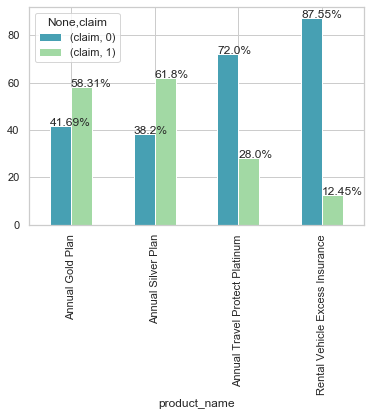

In [44]:
ax = z.unstack().plot.bar()
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(np.round(h,2))+'%', (x,y+h))
plt.show()

In [45]:
z = d.groupby(["product_name","agency","agency_type"])["claim"].value_counts(normalize=True)*100

In [46]:
z

product_name                     agency  agency_type    claim
Annual Gold Plan                 C2B     Airlines       1        58.305085
                                                        0        41.694915
Annual Silver Plan               C2B     Airlines       1        61.797274
                                                        0        38.202726
Annual Travel Protect Platinum   LWC     Travel Agency  0        72.000000
                                                        1        28.000000
Rental Vehicle Excess Insurance  CWT     Travel Agency  0        87.553207
                                                        1        12.446793
Name: claim, dtype: float64

#### Inference:
*  Agency types  air lines focus on net sale, Travel agency focus on commision

### Agency Type v. Claim rate

In [47]:
df.groupby(["agency_type"])["claim"].value_counts(normalize=True)*100

agency_type    claim
Airlines       0        68.106734
               1        31.893266
Travel Agency  0        90.861813
               1         9.138187
Name: claim, dtype: float64

#### Inference:
* Bodies with higher net sales are trying increase the claim rate,were as bodies with higher comissions are trying to have lower claim rate.

---
#### Plotting Claim rates for list of top 5 products (5 mean & 5 sum) for Net Sales and Commission

In [79]:
list_net_sales_top5_mean = ['Annual Gold Plan','Annual Travel Protect Platinum','Annual Travel Protect Gold','Annual Silver Plan','Annual Travel Protect Silver']
list_net_sales_top5_sum = [
    'Annual Silver Plan',
    '2 way Comprehensive Plan',
    'Cancellation Plan',
    'Rental Vehicle Excess Insurance',
    'Silver Plan']

In [80]:
product_cpercent = pd.DataFrame(df.groupby(['product_name'])['claim'].value_counts(normalize=True)*100)
product_cpercent.columns = ['Claim_percent']
product_cpercent.reset_index(inplace=True)
# product_cpercent.set_index('Product Name')
# product_cpercent

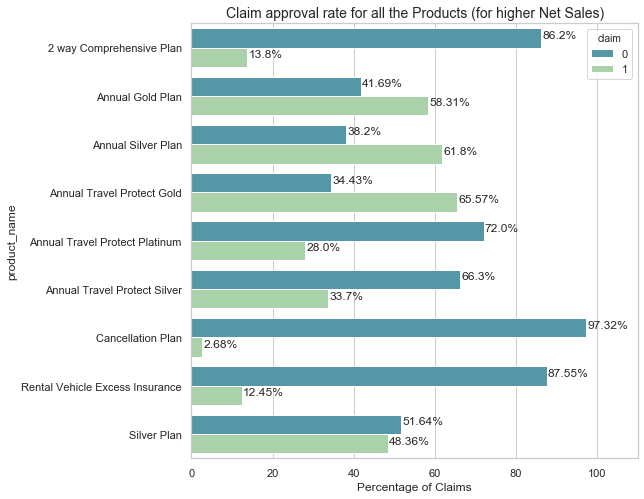

In [83]:
fig = plt.figure(figsize=(8,8))
ax = sns.barplot(y='product_name', x='Claim_percent',
        data=product_cpercent[   (product_cpercent['product_name'] == list_net_sales_top5_mean[0])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_mean[1])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_mean[2])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_mean[3])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_mean[4])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_sum[0])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_sum[1])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_sum[2])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_sum[3])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_sum[4])]
        ,hue='claim')
plt.title('Claim approval rate for all the Products (for higher Net Sales)',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')

plt.xlim((0,110))

for p in ax.patches:
    _x = p.get_x() + p.get_width() + 0.3
    _y = p.get_y() + p.get_height() - 0.2
    value = str(np.round(p.get_width(),2))+'%'
    ax.text(_x, _y, value, va="baseline", ha='left')
#     w,h = p.get_width(), p.get_height()
#     x,y = p.get_xy()
#     ax.text(x+w-3,y,str(np.round(w,2))+'%')
# for index, row in top10_products_c1.iterrows():
#     ax.text(row['Claim_percent'], row.name, round(row['Claim_percent'],2), color='black')
plt.show()

In [84]:
list_comm_top5_mean = ['Annual Travel Protect Platinum',
'Annual Travel Protect Gold',
'Annual Travel Protect Silver',
'Annual Gold Plan',
'Annual Silver Plan']
list_comm_top5_sum = ['Rental Vehicle Excess Insurance',
'Annual Silver Plan',
'Bronze Plan',
'Basic Plan',]



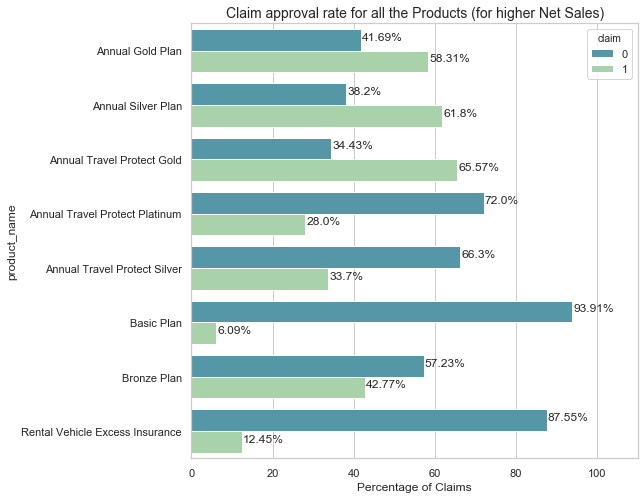

In [85]:
fig = plt.figure(figsize=(8,8))
ax = sns.barplot(y='product_name', x='Claim_percent',
        data=product_cpercent[   (product_cpercent['product_name'] == list_comm_top5_mean[0])|
                                 (product_cpercent['product_name'] == list_comm_top5_mean[1])|
                                 (product_cpercent['product_name'] == list_comm_top5_mean[2])|
                                 (product_cpercent['product_name'] == list_comm_top5_mean[3])|
                                 (product_cpercent['product_name'] == list_comm_top5_mean[4])|
                                 (product_cpercent['product_name'] == list_comm_top5_sum[0])|
                                 (product_cpercent['product_name'] == list_comm_top5_sum[1])|
                                 (product_cpercent['product_name'] == list_comm_top5_sum[2])|
                                 (product_cpercent['product_name'] == list_comm_top5_sum[3])]
        ,hue='claim')
plt.title('Claim approval rate for all the Products (for higher Net Sales)',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')

plt.xlim((0,110))

for p in ax.patches:
    _x = p.get_x() + p.get_width() + 0.3
    _y = p.get_y() + p.get_height() - 0.2
    value = str(np.round(p.get_width(),2))+'%'
    ax.text(_x, _y, value, va="baseline", ha='left')
#     w,h = p.get_width(), p.get_height()
#     x,y = p.get_xy()
#     ax.text(x+w-3,y,str(np.round(w,2))+'%')
# for index, row in top10_products_c1.iterrows():
#     ax.text(row['Claim_percent'], row.name, round(row['Claim_percent'],2), color='black')
plt.show()

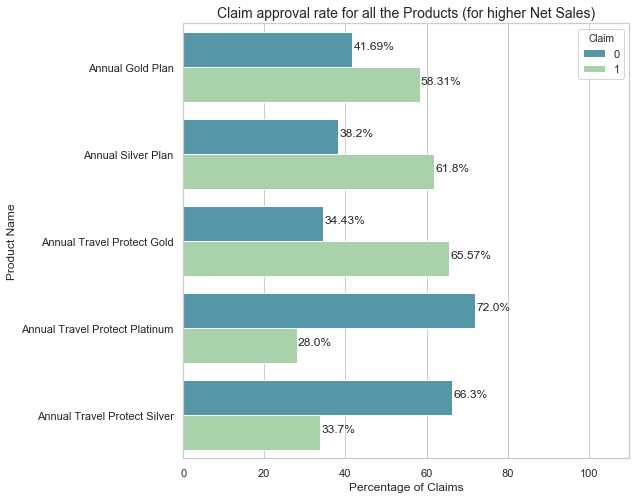

In [92]:
# net sales mean only
fig = plt.figure(figsize=(8,8))
ax = sns.barplot(y='product_name', x='Claim_percent',
        data=product_cpercent[   (product_cpercent['product_name'] == list_net_sales_top5_mean[0])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_mean[1])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_mean[2])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_mean[3])|
                                 (product_cpercent['product_name'] == list_net_sales_top5_mean[4])]
        ,hue='claim')
plt.title('Claim approval rate for all the Products (for higher Net Sales)',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')

plt.xlim((0,110))

for p in ax.patches:
    _x = p.get_x() + p.get_width() + 0.3
    _y = p.get_y() + p.get_height() - 0.2
    value = str(np.round(p.get_width(),2))+'%'
    ax.text(_x, _y, value, va="baseline", ha='left')
#     w,h = p.get_width(), p.get_height()
#     x,y = p.get_xy()
#     ax.text(x+w-3,y,str(np.round(w,2))+'%')
# for index, row in top10_products_c1.iterrows():
#     ax.text(row['Claim_percent'], row.name, round(row['Claim_percent'],2), color='black')
plt.show()

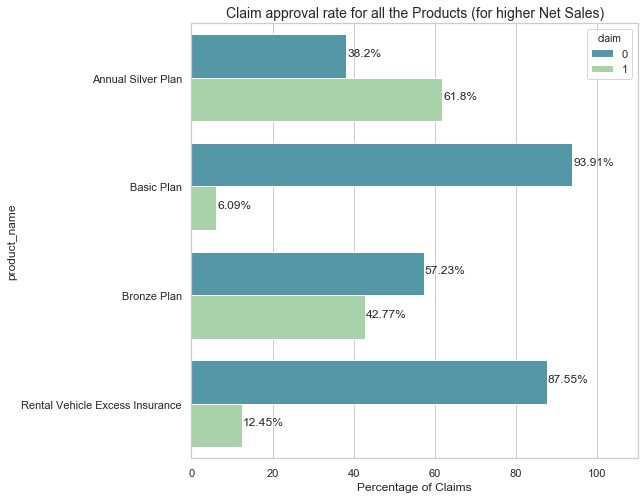

In [87]:
# commission sum only

fig = plt.figure(figsize=(8,8))
ax = sns.barplot(y='product_name', x='Claim_percent',
        data=product_cpercent[   (product_cpercent['product_name'] == list_comm_top5_sum[0])|
                                 (product_cpercent['product_name'] == list_comm_top5_sum[1])|
                                 (product_cpercent['product_name'] == list_comm_top5_sum[2])|
                                 (product_cpercent['product_name'] == list_comm_top5_sum[3])]
        ,hue='claim')
plt.title('Claim approval rate for all the Products (for higher Net Sales)',fontdict={'fontsize':14})
plt.xlabel('Percentage of Claims')

plt.xlim((0,110))

for p in ax.patches:
    _x = p.get_x() + p.get_width() + 0.3
    _y = p.get_y() + p.get_height() - 0.2
    value = str(np.round(p.get_width(),2))+'%'
    ax.text(_x, _y, value, va="baseline", ha='left')
#     w,h = p.get_width(), p.get_height()
#     x,y = p.get_xy()
#     ax.text(x+w-3,y,str(np.round(w,2))+'%')
# for index, row in top10_products_c1.iterrows():
#     ax.text(row['Claim_percent'], row.name, round(row['Claim_percent'],2), color='black')
plt.show()